# How to Summarize Data in Python

## Learning Objectives
When exploring data, one of the most important things we can do is summarize it so we can better understand it. A common way to summarize data is by computing aggregations such as mean, median, maximum and minimum. These aggregations or statistical measures (as they are commonly referred to) describe the general and specific characteristics of our data. This is why these types of aggregations are sometimes referred to as **descriptive statistics** or **summary statistics**. The pandas DataFrame provides several methods for computing descriptive statistics. By the end of this tutorial, you will have learned:

+ how to describe a DataFrame
+ how to get simple aggregations
+ how to get group-level aggregations

## How to Describe a DataFrame

In [6]:
import pandas as pd
washers = pd.read_csv("washers.csv")
washers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             261 non-null    int64  
 1   BrandName      261 non-null    object 
 2   ModelNumber    261 non-null    object 
 3   UPC            261 non-null    object 
 4   Configuration  261 non-null    object 
 5   Features       202 non-null    object 
 6   Market         261 non-null    object 
 7   Volume         261 non-null    float64
 8   IMEF           261 non-null    float64
 9   MinimumIMEF    261 non-null    float64
 10  EnergyUse      261 non-null    int64  
 11  IWF            261 non-null    float64
 12  MaximumIWF     261 non-null    float64
 13  WaterUse       261 non-null    int64  
 14  DateAvailable  261 non-null    object 
 15  DateCertified  261 non-null    object 
 16  Countries      261 non-null    object 
 17  MostEfficient  261 non-null    object 
dtypes: float64

In [7]:
washers.head()

,ID,BrandName,ModelNumber,UPC,Configuration,Features,Market,Volume,IMEF,MinimumIMEF,EnergyUse,IWF,MaximumIWF,WaterUse,DateAvailable,DateCertified,Countries,MostEfficient
0,2342279,GE,GTW845C*N***,1,Top Load,"Gentle Cycle,Delayed Start,Sanitize Option",Residential,5.0,2.06,1.29,192,4.3,8.4,6368,8/5/19,7/31/19,"United States, Canada",No
1,2331684,GE,GUD27EE*N***,84691844198,Top Load,Gentle Cycle,Residential,3.9,2.06,1.29,140,4.3,8.4,4947,12/10/18,11/30/18,United States,No
2,2331685,GE,GUD27EE*N***,7.57638E+11,Top Load,Gentle Cycle,Residential,3.9,2.06,1.29,140,4.3,8.4,4947,12/10/18,11/30/18,Canada,No
3,2331687,GE,GUD27GE*N***,84691844181,Top Load,Gentle Cycle,Residential,3.9,2.06,1.29,140,4.3,8.4,4947,12/10/18,11/30/18,United States,No
4,2331686,GE,GUD37EE*N***,7.57638E+11,Top Load,Gentle Cycle,Residential,3.9,2.06,1.29,140,4.3,8.4,4947,12/10/18,11/30/18,Canada,No


## How to get Simple Aggregations
The `describe()` method returns a statistical summary for each of the columns in a DataFrame. It's important to note that the descriptive statistics returned by the `describe()` method depends on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `unique`       | Number of unique non-missing values                   |
| `top`       | Most commonly occuring value   |
| `freq`        | Frequency of the most commonly occuring value                   |


In [8]:
# Generate descriptive statistics for all numeric columns
washers.describe()

,ID,Volume,IMEF,MinimumIMEF,EnergyUse,IWF,MaximumIWF,WaterUse
count,2.610000e+02,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2.320802e+06,4.374713,2.456820,1.591341,129.214559,3.598851,6.372797,4632.727969
std,1.574793e+04,0.965866,0.380599,0.274261,43.850620,0.538265,1.845032,1292.693059
min,2.300602e+06,1.900000,2.060000,1.290000,60.000000,2.700000,4.700000,1728.000000
25%,2.310408e+06,4.300000,2.060000,1.290000,99.000000,3.200000,4.700000,3852.000000
50%,2.310499e+06,4.500000,2.380000,1.840000,120.000000,3.600000,4.700000,4429.000000
75%,2.332089e+06,5.000000,2.920000,1.840000,150.000000,4.300000,8.400000,5632.000000
max,2.359624e+06,6.200000,3.100000,1.840000,311.000000,4.300000,8.400000,7827.000000


In [12]:
# Generate descriptive statistics for a specific non-numeric column
washers['BrandName'].describe()

count     261
unique     22
top        LG
freq       50
Name: BrandName, dtype: object

In [11]:
# Compute specific statistics for the Volume column
mean_volume = washers['Volume'].mean()
min_volume = washers['Volume'].min()
max_volume = washers['Volume'].max()

print(f"Mean: {mean_volume}, Min: {min_volume}, Max: {max_volume}")

Mean: 4.374712643678161, Min: 1.9, Max: 6.2


For numeric columns, the `describe()` method returns the following descriptive statistics:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `mean`       | Average of the non-missing values                   |
| `std`       | Standard deviation of the values   |
| `min`        | Smallest value                  |
| `25%`         | 25th percentile                       |
| `50%`       | 50th percentile (same as the median)                   |
| `75%`       | 75th percentile   |
| `max`        | Largest value                   |


In [4]:
washers[['Volume']].describe()

,Volume
count,261.000000
mean,4.374713
std,0.965866
min,1.900000
25%,4.300000
50%,4.500000
75%,5.000000
max,6.200000


In [13]:
# Count the occurrences of each washer brand
washers[['BrandName']].value_counts()

BrandName      
LG                 50
GE                 49
Samsung            47
Kenmore            30
Whirlpool          26
Maytag             18
Electrolux          7
Bosch               4
Miele               4
Asko                4
Beko                3
Blomberg            3
Crosley             3
Midea               2
Magic Chef          2
Amana               2
Fisher & Paykel     2
Insignia            1
Inglis              1
Gaggenau            1
GE Adora            1
Haier               1
Name: count, dtype: int64

In [6]:
# Get the percentage distribution of washer brands
washers[['BrandName']].value_counts(normalize = True)

BrandName      
LG                 0.191571
GE                 0.187739
Samsung            0.180077
Kenmore            0.114943
Whirlpool          0.099617
Maytag             0.068966
Electrolux         0.026820
Miele              0.015326
Asko               0.015326
Bosch              0.015326
Beko               0.011494
Blomberg           0.011494
Crosley            0.011494
Fisher & Paykel    0.007663
Amana              0.007663
Magic Chef         0.007663
Midea              0.007663
GE Adora           0.003831
Haier              0.003831
Inglis             0.003831
Insignia           0.003831
Gaggenau           0.003831
dtype: float64

In [7]:
# Compute the mean volume of washers
washers[['Volume']].mean()

Volume    4.374713
dtype: float64

In [15]:
# Compute the total volume of washers
washers['Volume'].sum()

1141.8

## How to get Group-level Aggregations

In [16]:
# Compute the average volume of washers grouped by brand
washers.groupby('BrandName')[['Volume']].mean()

,Volume
BrandName,
Amana,4.250000
Asko,2.525000
Beko,2.133333
Blomberg,2.300000
Bosch,2.200000
Crosley,4.400000
Electrolux,3.785714
Fisher & Paykel,2.400000
GE,4.328571


In [19]:
# Sort the grouped data by average volume
washers.groupby('BrandName')[['Volume']].mean().sort_values(by = 'Volume')

,Volume
BrandName,
Beko,2.133333
Gaggenau,2.200000
Bosch,2.200000
Miele,2.300000
Blomberg,2.300000
Fisher & Paykel,2.400000
Haier,2.400000
Asko,2.525000
Magic Chef,2.700000


In [20]:
# Compute multiple aggregations for washer volumes by brand
washers.groupby('BrandName')[['Volume']].agg(['mean','median','min','max'])

Volume                 
                     mean median  min  max
BrandName                                 
Amana            4.250000   4.25  4.2  4.3
Asko             2.525000   2.70  2.0  2.7
Beko             2.133333   2.00  1.9  2.5
Blomberg         2.300000   2.50  1.9  2.5
Bosch            2.200000   2.20  2.2  2.2
Crosley          4.400000   4.50  4.2  4.5
Electrolux       3.785714   4.30  2.4  4.4
Fisher & Paykel  2.400000   2.40  2.4  2.4
GE               4.328571   4.50  2.2  5.2
GE Adora         4.200000   4.20  4.2  4.2
Gaggenau         2.200000   2.20  2.2  2.2
Haier            2.400000   2.40  2.4  2.4
Inglis           4.300000   4.30  4.3  4.3
Insignia         4.800000   4.80  4.8  4.8
Kenmore          4.796667   4.80  2.4  6.2
LG               4.596000   4.50  2.3  5.8
Magic Chef       2.700000   2.70  2.7  2.7
Maytag           4.988889   4.90  4.4  6.2
Midea            5.200000   5.20  5.2  5.2
Miele            2.300000   2.30  2.3  2.3
Samsung          4.729787   4.80  2.2  5.6
Whirlpool        4.453846   4.50  2.0  5.3

In [22]:
# Calculate the range of washer volumes for each brand
volume_range = washers.groupby('BrandName')['Volume'].agg(lambda x: x.max() - x.min())
volume_range

BrandName
Amana              0.1
Asko               0.7
Beko               0.6
Blomberg           0.6
Bosch              0.0
Crosley            0.3
Electrolux         2.0
Fisher & Paykel    0.0
GE                 3.0
GE Adora           0.0
Gaggenau           0.0
Haier              0.0
Inglis             0.0
Insignia           0.0
Kenmore            3.8
LG                 3.5
Magic Chef         0.0
Maytag             1.8
Midea              0.0
Miele              0.0
Samsung            3.4
Whirlpool          3.3
Name: Volume, dtype: float64

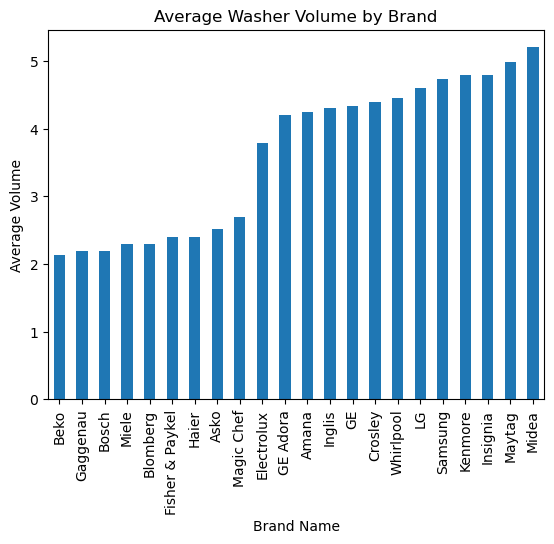

In [27]:
# Visualize the average washer volume by brand
import matplotlib.pyplot as plt

average_volume_by_brand = washers.groupby('BrandName')['Volume'].mean()
average_volume_by_brand.sort_values().plot(kind='bar', title='Average Washer Volume by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Average Volume')
plt.show()